<a href="https://colab.research.google.com/github/Adnanbd/PatternLab/blob/master/Pattern_Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **G-Drive Mount & Data Load**

- G-Drive


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Loading GSUB_X_Train.npy

In [ ]:
import glob

import numpy as np

data_files = glob.glob("/content/drive/MyDrive/Study/Pattern Lab/temp1/Gsub_x_train.npy")

dataset =np.load(data_files[0])

x_train = dataset.copy()

print(dataset.shape)

(1688, 1302)


- Loading GSUB_Y_Train.npy

In [ ]:
data_files1 = glob.glob("/content/drive/MyDrive/Study/Pattern Lab/temp1/Gsub_y_train.npy")

dataset_y =np.load(data_files1[0])
y_train = dataset_y.copy()

print(dataset_y.shape)

(1688,)


- Opening Previusly Saved Index_detail Text File

In [ ]:
with open('/content/drive/MyDrive/Study/Pattern Lab/temp/FeatureIndex.txt', "r") as file1:
    FileContent = file1.read()
    #print(FileContent)
index_list = FileContent.split("#")
file1.close()
print(*index_list, sep = "\n") 

{'Feature': 'ANF', 'start_index': 0, 'end_index': 40}
{'Feature': 'gap1', 'start_index': 41, 'end_index': 72}
{'Feature': 'gap3', 'start_index': 73, 'end_index': 136}
{'Feature': 'gap5', 'start_index': 137, 'end_index': 232}
{'Feature': 'gap7', 'start_index': 233, 'end_index': 360}
{'Feature': 'lag7', 'start_index': 361, 'end_index': 402}
{'Feature': 'EIIP', 'start_index': 403, 'end_index': 443}
{'Feature': '10', 'start_index': 444, 'end_index': 571}
{'Feature': '5', 'start_index': 572, 'end_index': 719}
{'Feature': 'PseEIIP', 'start_index': 720, 'end_index': 783}
{'Feature': 'lag7', 'start_index': 784, 'end_index': 797}
{'Feature': 'binary', 'start_index': 798, 'end_index': 961}
{'Feature': 'kmer1', 'start_index': 962, 'end_index': 965}
{'Feature': 'kmer2', 'start_index': 966, 'end_index': 981}
{'Feature': 'kmer3', 'start_index': 982, 'end_index': 1045}
{'Feature': 'kmer4', 'start_index': 1046, 'end_index': 1301}



- Divide 16 Features Indices in 4 parts Randomly

In [ ]:
import random

feature_group_1 = random.sample(index_list, 4)
feature_group_2 = random.sample(index_list, 4)
feature_group_3 = random.sample(index_list, 4)
feature_group_4 = random.sample(index_list, 4)

In [ ]:
print(feature_group_1)
print(feature_group_2)
print(feature_group_3)
print(feature_group_4)

print(eval(feature_group_1[0])["end_index"])

["{'Feature': 'kmer4', 'start_index': 1046, 'end_index': 1301}", "{'Feature': 'kmer3', 'start_index': 982, 'end_index': 1045}", "{'Feature': 'PseEIIP', 'start_index': 720, 'end_index': 783}", "{'Feature': 'lag7', 'start_index': 361, 'end_index': 402}"]
["{'Feature': 'gap5', 'start_index': 137, 'end_index': 232}", "{'Feature': 'kmer1', 'start_index': 962, 'end_index': 965}", "{'Feature': 'lag7', 'start_index': 361, 'end_index': 402}", "{'Feature': '10', 'start_index': 444, 'end_index': 571}"]
["{'Feature': '5', 'start_index': 572, 'end_index': 719}", "{'Feature': 'gap5', 'start_index': 137, 'end_index': 232}", "{'Feature': 'lag7', 'start_index': 784, 'end_index': 797}", "{'Feature': '10', 'start_index': 444, 'end_index': 571}"]
["{'Feature': 'PseEIIP', 'start_index': 720, 'end_index': 783}", "{'Feature': '10', 'start_index': 444, 'end_index': 571}", "{'Feature': 'kmer1', 'start_index': 962, 'end_index': 965}", "{'Feature': '5', 'start_index': 572, 'end_index': 719}"]
1301


- Finally Dividing X_train dataset in 4 parts according to previous index partition

In [ ]:
all_feature_group_list_np = []

f = eval(feature_group_1[0])
feature_group_1_np = dataset[:,f["start_index"]:f["end_index"]+1]
i=0
for feature in feature_group_1:
  if i > 0 :
    f = eval(feature)
    feature_group_1_np = np.concatenate((feature_group_1_np,dataset[:,f["start_index"]:f["end_index"]+1]),axis=1)
  i = i+1
print(feature_group_1_np.shape)
all_feature_group_list_np.append(feature_group_1_np)

f = eval(feature_group_2[0])
feature_group_2_np = dataset[:,f["start_index"]:f["end_index"]+1]
i=0
for feature in feature_group_2:
  if i > 0 :
    f = eval(feature)
    feature_group_2_np = np.concatenate((feature_group_2_np,dataset[:,f["start_index"]:f["end_index"]+1]),axis=1)
  i = i+1
print(feature_group_2_np.shape)
all_feature_group_list_np.append(feature_group_2_np)

f = eval(feature_group_3[0])
feature_group_3_np = dataset[:,f["start_index"]:f["end_index"]+1]
i=0
for feature in feature_group_3:
  if i > 0 :
    f = eval(feature)
    feature_group_3_np = np.concatenate((feature_group_3_np,dataset[:,f["start_index"]:f["end_index"]+1]),axis=1)
  i = i+1
print(feature_group_3_np.shape)
all_feature_group_list_np.append(feature_group_3_np)

f = eval(feature_group_4[0])
feature_group_4_np = dataset[:,f["start_index"]:f["end_index"]+1]
i=0
for feature in feature_group_4:
  if i > 0 :
    f = eval(feature)
    feature_group_4_np = np.concatenate((feature_group_4_np,dataset[:,f["start_index"]:f["end_index"]+1]),axis=1)
  i = i+1
print(feature_group_4_np.shape)

all_feature_group_list_np.append(feature_group_4_np)



(1688, 426)
(1688, 270)
(1688, 386)
(1688, 344)


- Importing all necessary library

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt 

- Imporing 5 Classifiers

In [ ]:
xgb_model = xgb.XGBClassifier()
svc_model = SVC(kernel='linear')
lr_model = LogisticRegression(max_iter = 1000)
rfc_model = RandomForestClassifier()
abc_model = AdaBoostClassifier(n_estimators=100, random_state=0)


- Generating Accuracy Matrix value for 4 partition by applying 5 classifiers

In [ ]:
final_feature_all_value = []

i = 1
for extract_feature in all_feature_group_list_np:
  print(f"For Feature List {i} :")
  a = cross_val_score(xgb_model, extract_feature, dataset_y, cv=5, scoring='accuracy').mean()
  print(a)
  b = cross_val_score(svc_model, extract_feature, dataset_y, cv=5, scoring='accuracy').mean()
  print(b)
  c = cross_val_score(lr_model, extract_feature, dataset_y, cv=5, scoring='accuracy').mean()
  print(c)
  d = cross_val_score(rfc_model, extract_feature, dataset_y, cv=5, scoring='accuracy').mean()
  print(d)
  e = cross_val_score(abc_model, extract_feature, dataset_y, cv=5, scoring='accuracy').mean()
  print(e)
  final_feature_all_value.append([["XGBoost",a],["SVC linear kernel",b],["Logistic Regression",c],["Random Forest",d],["ADAboost",e],])
  i = i + 1



For Feature List 1 :
0.7464505820588907
0.735769845311046
0.7239144557793268
0.747042298035222
0.7019981388162169
For Feature List 2 :
0.7511966007058452
0.7967868242234826
0.7790177865959651
0.7191930188049795
0.7446613874598352
For Feature List 3 :
0.7719049040436852
0.7926272540515864
0.7961793057433322
0.7304426456903059
0.7559197935139502
For Feature List 4 :
0.7908766877951996
0.7795989675697506
0.7872930310958159
0.743470932172142
0.7748827980966763


- Now, Generating **Matthews correlation coefficient(MCC), Sensitivity & Specificity**  value for 4 partition by applying 5 classifiers

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
xgb_mcc = []
xgb_sensitivity = []
xgb_specificity = []

svc_mcc = []
svc_sensitivity = []
svc_specificity = []

lr_mcc = []
lr_sensitivity = []
lr_specificity = []

rfc_mcc = []
rfc_sensitivity = []
rfc_specificity = []

abc_mcc = []
abc_sensitivity = []
abc_specificity = []

i=0
for extract_feature in all_feature_group_list_np:
  j = 0
  for train_index, test_index in kf.split(extract_feature):
    xgb = xgb_model.fit(extract_feature[train_index], dataset_y[train_index])
    xgb_predictions = xgb.predict(extract_feature[test_index])
    xgb_actuals = dataset_y[test_index]
    tn, fp, fn, tp = confusion_matrix(xgb_actuals, xgb_predictions).ravel()
    xgb_sensitivity.append(tp / (tp + fn))
    xgb_specificity.append(tn / (tn + fp))
    xgb_mcc.append(matthews_corrcoef(xgb_actuals, xgb_predictions))

    svc = svc_model.fit(extract_feature[train_index], dataset_y[train_index])
    svc_predictions = svc.predict(extract_feature[test_index])
    svc_actuals = dataset_y[test_index]
    tn, fp, fn, tp = confusion_matrix(svc_actuals, svc_predictions).ravel()
    svc_sensitivity.append(tp / (tp + fn))
    svc_specificity.append(tn / (tn + fp))
    svc_mcc.append(matthews_corrcoef(svc_actuals, svc_predictions))

    lr = lr_model.fit(extract_feature[train_index], dataset_y[train_index])
    lr_predictions = lr.predict(extract_feature[test_index])
    lr_actuals = dataset_y[test_index]
    tn, fp, fn, tp = confusion_matrix(lr_actuals, lr_predictions).ravel()
    lr_sensitivity.append(tp / (tp + fn))
    lr_specificity.append(tn / (tn + fp))
    lr_mcc.append(matthews_corrcoef(lr_actuals, lr_predictions))

    rfc = rfc_model.fit(extract_feature[train_index], dataset_y[train_index])
    rfc_predictions = rfc.predict(extract_feature[test_index])
    rfc_actuals = dataset_y[test_index]
    tn, fp, fn, tp = confusion_matrix(rfc_actuals, rfc_predictions).ravel()
    rfc_sensitivity.append(tp / (tp + fn))
    rfc_specificity.append(tn / (tn + fp))
    rfc_mcc.append(matthews_corrcoef(rfc_actuals, rfc_predictions))

    abc = abc_model.fit(extract_feature[train_index], dataset_y[train_index])
    abc_predictions = abc.predict(extract_feature[test_index])
    abc_actuals = dataset_y[test_index]
    tn, fp, fn, tp = confusion_matrix(abc_actuals, abc_predictions).ravel()
    abc_sensitivity.append(tp / (tp + fn))
    abc_specificity.append(tn / (tn + fp))
    abc_mcc.append(matthews_corrcoef(abc_actuals, abc_predictions))
    j = j+1

    
  final_feature_all_value[i][0].append(sum(xgb_mcc)/len(xgb_mcc))
  final_feature_all_value[i][0].append(sum(xgb_sensitivity)/len(xgb_sensitivity))
  final_feature_all_value[i][0].append(sum(xgb_specificity)/len(xgb_specificity))

  final_feature_all_value[i][1].append(sum(svc_mcc)/len(svc_mcc))
  final_feature_all_value[i][1].append(sum(svc_sensitivity)/len(svc_sensitivity))
  final_feature_all_value[i][1].append(sum(svc_specificity)/len(svc_specificity))

  final_feature_all_value[i][2].append(sum(lr_mcc)/len(lr_mcc))
  final_feature_all_value[i][2].append(sum(lr_sensitivity)/len(lr_sensitivity))
  final_feature_all_value[i][2].append(sum(lr_specificity)/len(lr_specificity))

  final_feature_all_value[i][3].append(sum(rfc_mcc)/len(rfc_mcc))
  final_feature_all_value[i][3].append(sum(rfc_sensitivity)/len(rfc_sensitivity))
  final_feature_all_value[i][3].append(sum(rfc_specificity)/len(rfc_specificity))

  final_feature_all_value[i][4].append(sum(abc_mcc)/len(abc_mcc))
  final_feature_all_value[i][4].append(sum(abc_sensitivity)/len(abc_sensitivity))
  final_feature_all_value[i][4].append(sum(abc_specificity)/len(abc_specificity))


  i = i+1
  


  #print(confusion_matrix(actuals, predictions))

In [ ]:
temp_final_feature_all_value = final_feature_all_value.copy() 

In [ ]:
#print(*final_feature_all_value[0],sep='\n')
#final_feature_all_value = temp_final_feature_all_value.copy()

for x in final_feature_all_value:
  for y in x:
    y[1] = "{:.2f}".format(y[1] * 100)
    y[2] = "{:.2f}".format(y[2])
    y[3] = "{:.2f}".format(y[3] * 100)
    y[4] = "{:.2f}".format(y[4] * 100)

print(*final_feature_all_value[0],sep='\n')


['XGBoost', '74.65', '0.50', '73.05', '76.97']
['SVC linear kernel', '73.58', '0.48', '73.79', '74.06']
['Logistic Regression', '72.39', '0.46', '72.60', '73.37']
['Random Forest', '74.70', '0.49', '73.97', '75.34']
['ADAboost', '70.20', '0.41', '69.21', '71.89']


- Plotting all value in a Table for better visualizaton :

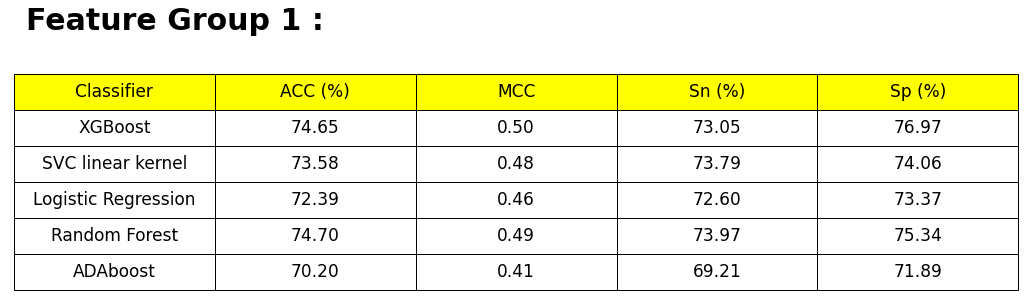

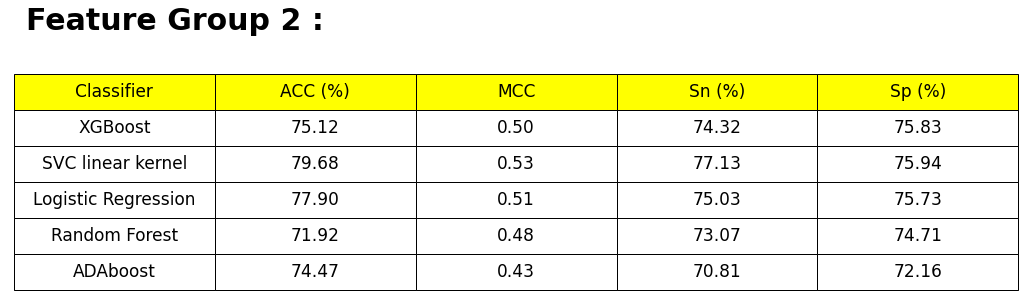

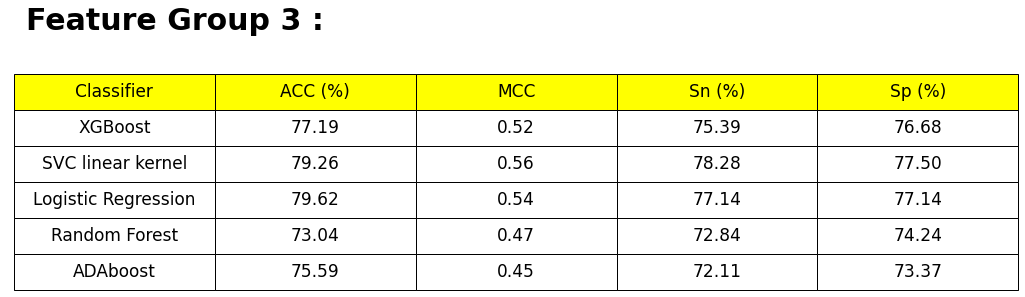

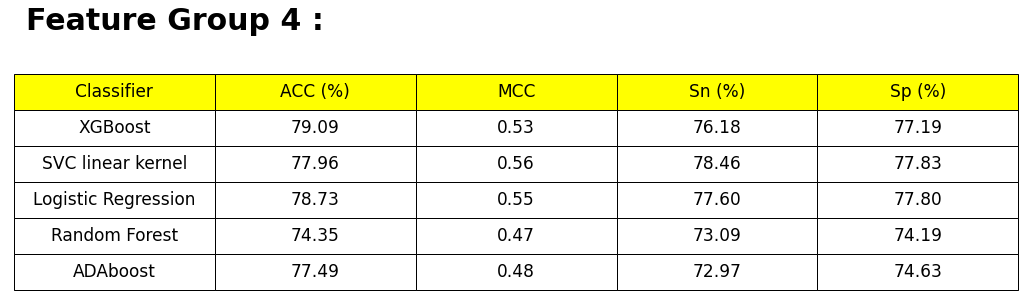

In [ ]:
labels = [
       "Classifier",
       "ACC (%)",
       "MCC",
       "Sn (%)",
       "Sp (%)"
]

fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = final_feature_all_value[0],  
    colLabels = labels, 
    colColours =["yellow"] * 5, 
    cellLoc ='center',
    loc ='upper left',  
   )  
table.set_fontsize(25)
table.scale(3, 3)
ax.set_title('Feature Group 1 :\n', 
             fontweight ="bold",fontsize = 30) 


fig1, ax1 = plt.subplots() 
ax1.set_axis_off() 
table1 = ax1.table( 
    cellText = final_feature_all_value[1],  
    colLabels = labels, 
    colColours =["yellow"] * 5, 
    cellLoc ='center',
    loc ='upper left',  
   )  
table1.set_fontsize(25)
table1.scale(3, 3)
ax1.set_title('Feature Group 2 :\n', 
             fontweight ="bold",fontsize = 30)

fig2, ax2 = plt.subplots() 
ax2.set_axis_off() 
table2 = ax2.table( 
    cellText = final_feature_all_value[2],  
    colLabels = labels, 
    colColours =["yellow"] * 5, 
    cellLoc ='center',
    loc ='upper left',  
   )  
table2.set_fontsize(25)
table2.scale(3, 3)
ax2.set_title('Feature Group 3 :\n', 
             fontweight ="bold",fontsize = 30)

fig3, ax3 = plt.subplots() 
ax3.set_axis_off() 
table3 = ax3.table( 
    cellText = final_feature_all_value[3],  
    colLabels = labels, 
    colColours =["yellow"] * 5, 
    cellLoc ='center',
    loc ='upper left',  
   )  
table3.set_fontsize(25)
table3.scale(3, 3)
ax3.set_title('Feature Group 4 :\n', 
             fontweight ="bold",fontsize = 30)

plt.show() 





- Loading x_test and y_test:

In [ ]:
data_files3 = glob.glob("/content/drive/MyDrive/Study/Pattern Lab/temp1/Gsub_x_test.npy")
data_files4 = glob.glob("/content/drive/MyDrive/Study/Pattern Lab/temp1/Gsub_y_test.npy")

x_test =np.load(data_files3[0])
y_test =np.load(data_files4[0])


print(x_test.shape)
print(y_test.shape)

(118, 1302)
(118,)


- Applying All Classifier on gsub_x_train and test with gsub_x_test

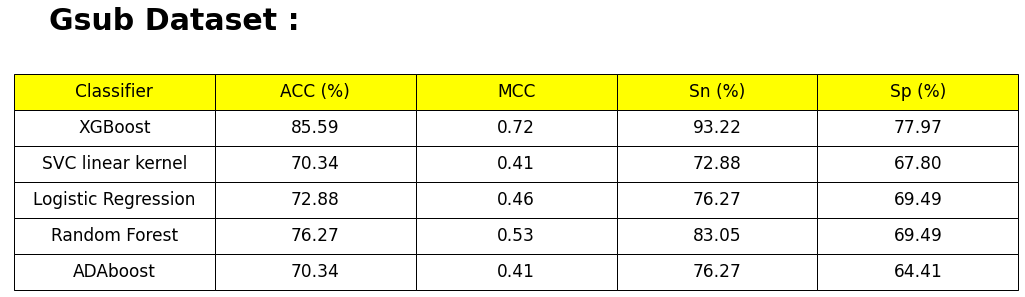

In [ ]:
xgb = xgb_model.fit(x_train, y_train)
xgb_predictions = xgb.predict(x_test)
xgb_actuals = y_test
tn, fp, fn, tp = confusion_matrix(xgb_actuals, xgb_predictions).ravel()
xgb_acc = (tp + tn )/ (tp + tn + fp + fn)
xgb_sensitivity = (tp / (tp + fn))
xgb_specificity = (tn / (tn + fp))
xgb_mcc = (matthews_corrcoef(xgb_actuals, xgb_predictions))

svc = svc_model.fit(x_train, y_train)
svc_predictions = svc.predict(x_test)
svc_actuals = y_test
tn, fp, fn, tp = confusion_matrix(svc_actuals, svc_predictions).ravel()
svc_acc = (tp + tn )/ (tp + tn + fp + fn)
svc_sensitivity = (tp / (tp + fn))
svc_specificity = (tn / (tn + fp))
svc_mcc = (matthews_corrcoef(svc_actuals, svc_predictions))

lr = lr_model.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)
lr_actuals = y_test
tn, fp, fn, tp = confusion_matrix(lr_actuals, lr_predictions).ravel()
lr_acc = (tp + tn )/ (tp + tn + fp + fn)
lr_sensitivity = (tp / (tp + fn))
lr_specificity = (tn / (tn + fp))
lr_mcc = (matthews_corrcoef(lr_actuals, lr_predictions))

rfc = rfc_model.fit(x_train, y_train)
rfc_predictions = rfc.predict(x_test)
rfc_actuals = y_test
tn, fp, fn, tp = confusion_matrix(rfc_actuals, rfc_predictions).ravel()
rfc_acc = (tp + tn )/ (tp + tn + fp + fn)
rfc_sensitivity = (tp / (tp + fn))
rfc_specificity = (tn / (tn + fp))
rfc_mcc = (matthews_corrcoef(rfc_actuals, rfc_predictions))

abc = abc_model.fit(x_train, y_train)
abc_predictions = abc.predict(x_test)
abc_actuals = y_test
tn, fp, fn, tp = confusion_matrix(abc_actuals, abc_predictions).ravel()
abc_acc = (tp + tn )/ (tp + tn + fp + fn)
abc_sensitivity = (tp / (tp + fn))
abc_specificity = (tn / (tn + fp))
abc_mcc = (matthews_corrcoef(abc_actuals, abc_predictions))



All_value = [["XGBoost",xgb_acc,xgb_mcc,xgb_sensitivity,xgb_specificity],["SVC linear kernel",svc_acc,svc_mcc,svc_sensitivity,svc_specificity],["Logistic Regression",lr_acc,lr_mcc,lr_sensitivity,lr_specificity],["Random Forest",rfc_acc,rfc_mcc,rfc_sensitivity,rfc_specificity],["ADAboost",abc_acc,abc_mcc,abc_sensitivity,abc_specificity],]

for y in All_value:
    y[1] = "{:.2f}".format(y[1] * 100)
    y[2] = "{:.2f}".format(y[2])
    y[3] = "{:.2f}".format(y[3] * 100)
    y[4] = "{:.2f}".format(y[4] * 100)



fig3, ax3 = plt.subplots() 
ax3.set_axis_off() 
table3 = ax3.table( 
    cellText = All_value,  
    colLabels = labels, 
    colColours =["yellow"] * 5, 
    cellLoc ='center',
    loc ='upper left',  
   )  
table3.set_fontsize(25)
table3.scale(3, 3)
ax3.set_title('Gsub Dataset :\n', 
             fontweight ="bold",fontsize = 30)

plt.show() 
